In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dummy-Data (1).csv')

In [3]:
class ComputeInsurancePrice(object):
    
    def __init__(self, age, gender, height, weight):
        self.age = age
        self.gender = gender
        self.height = height 
        self.weight = weight 
        pass
    
    def get_weight_kg(self):
        weight_kg = self.weight*0.454
        return weight_kg
    
    def get_height_mts(self):
        mt_feet = .305*float(str(self.height)[0])
        mt_in = .0254*float(str(self.height)[-2:])
        height_mts = mt_feet + mt_in
        return height_mts
        
    def get_ibm(self):
        weight_kg = self.get_weight_kg()
        height_mts = self.get_height_mts()
        ibm = float(weight_kg) / pow(float(height_mts),2)
        return ibm

    def get_price(self, age, ibm):
        price = 0
        reason = ''
        if (age >= 18 and age <= 39) and (ibm <= 17.49 or ibm >= 38.5):
            price = 750
            reason = "Age is between 18 to 39 and 'BMI' is either less than 17.49 or greater than 38.5"
        elif (age >= 40 and age <= 59) and (ibm <= 18.49 or ibm >= 38.5):
            price = 1000
            reason = "Age is between 40 to 59 and 'BMI' is either less than 18.49 or greater then 38.5"
        elif (age >= 60) and (ibm <= 18.49 or ibm >= 45.5):
            price = 2000
            reason = "Age is greater than 60 and 'BMI' is either less than 18.49 or greater than 38.5"
        else:
            price = 4000
            reason = "BMI is in right range"
        return price, reason
    
    def main(self):        
        age = self.age
        gender = self.gender
        ibm = self.get_ibm()
        price = 0
        reason = ''
        if gender.replace(' ','').lower() == 'female':
            price, reason = self.get_price(age, ibm)
            price = price - price*0.10
        else:
            price, reason = self.get_price(age, ibm)
        return price, reason, ibm
        
        

In [4]:
df

,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate
0,56372,31,Male,510,185,NaN
1,34565,35,Male,510,205,NaN
2,57732,45,Female,510,125,NaN
3,87324,38,Male,503,175,NaN
4,12323,39,Female,600,252,NaN
...,...,...,...,...,...,...
95,99511,35,Male,510,275,NaN
96,23781,27,Male,604,145,NaN
97,99517,35,Female,507,190,NaN
98,99520,38,Female,510,144,NaN


In [5]:
# classify the insurance price
price = []
reasons = []
ibm = []
for i in range(len(df)):
    person_class = ComputeInsurancePrice(df['Ins_Age'][i], df['Ins_Gender'][i],df['Ht'][i],df['Wt'][i]).main()
    price.append(person_class[0])
    reasons.append(person_class[1])
    ibm.append(person_class[2])
df['price'] = price
df['reason'] = reasons
df['BMI'] = ibm

In [6]:
df

,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate,price,reason,BMI
0,56372,31,Male,510,185,NaN,4000.0,BMI is in right range,26.538458
1,34565,35,Male,510,205,NaN,4000.0,BMI is in right range,29.407481
2,57732,45,Female,510,125,NaN,900.0,Age is between 40 to 59 and 'BMI' is either le...,17.931391
3,87324,38,Male,503,175,NaN,4000.0,BMI is in right range,30.988656
4,12323,39,Female,600,252,NaN,3600.0,BMI is in right range,34.162859
...,...,...,...,...,...,...,...,...,...
95,99511,35,Male,510,275,NaN,750.0,Age is between 18 to 39 and 'BMI' is either le...,39.449059
96,23781,27,Male,604,145,NaN,4000.0,BMI is in right range,17.643692
97,99517,35,Female,507,190,NaN,3600.0,BMI is in right range,29.749671
98,99520,38,Female,510,144,NaN,3600.0,BMI is in right range,20.656962


In [7]:
check_dist = pd.DataFrame(df['price'].value_counts())
check_dist = check_dist.reset_index()

In [8]:
check_dist

,index,price
0,4000.0,57
1,3600.0,31
2,900.0,5
3,750.0,3
4,1000.0,3
5,675.0,1


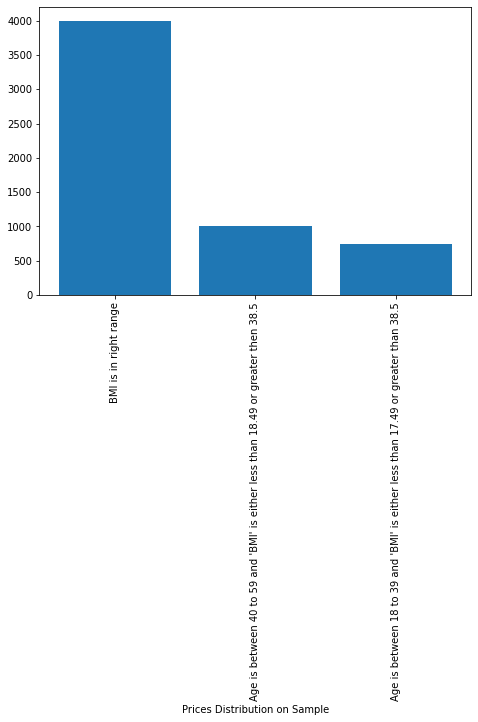

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
prices = df['reason']
amount = df['price']
ax.bar(prices,amount)
plt.xlabel('Prices Distribution on Sample')
plt.xticks(rotation='vertical')
plt.show()

# How to leverage the solution into a production environment?

There are two options.
Option 1# Simple, you load it into your website as a regular integration to your front end.

Option 2# Store the script into a Lambda function in AWS. Create an end point and each time that you receive a request with the necessary input parameters, you will get the results. This option is more expensive. Oriented to a big company, where you can keep track of the requests and monitor what happens with the traffic in time basis. 